In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
telcochurn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", nrows = 10000)
telcochurn_copy = telcochurn.copy(deep=True)
telcochurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#checking for null values
telcochurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

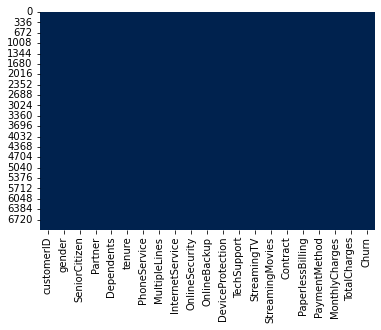

In [16]:
sns.heatmap(telcochurn.isnull(),cbar=False,cmap='cividis')

looks like there aren't any null values, so we don't need to replace any missing values

In [17]:
#checking for erroneous values
for col in telcochurn.columns:
    print('{} : {}'.format(col,telcochurn[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

Doesn't seem like there are any erroneous characters either

In [23]:
#turning all 'Yes' and 'No' (and 'No phone service') values into 1 and 0
sample = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in sample :
    telcochurn_copy[i] = telcochurn_copy[i].replace('Yes', 1)
    telcochurn_copy[i] = telcochurn_copy[i].replace('No', 0)
    telcochurn_copy[i] = telcochurn_copy[i].replace('No phone service', 0)

<AxesSubplot:>

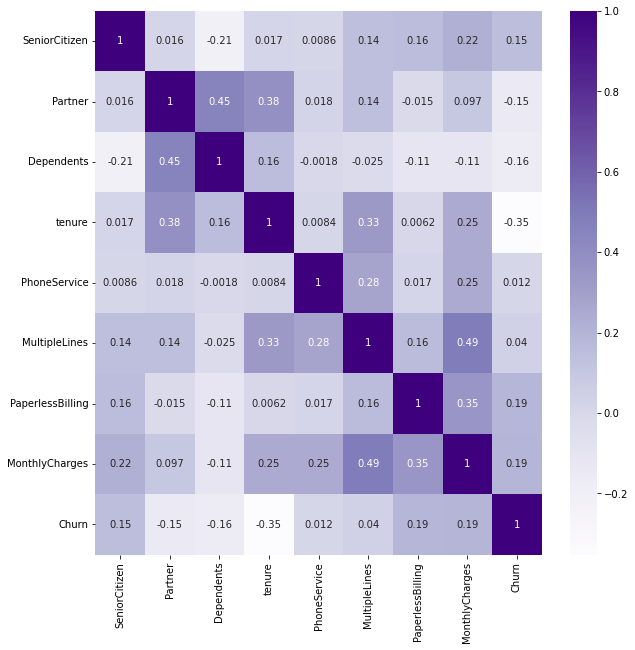

In [20]:
#heatmap of data
plt.figure(figsize=(10,10))
sns.heatmap(telcochurn_copy.corr(), cbar=True, annot=True, cmap='Purples')

Can try to find correlation coefficient between 2 key variables

In [25]:
telcochurn.index=['SeniorCitizen']
telcochurn

ValueError: Length mismatch: Expected axis has 7043 elements, new values have 1 elements

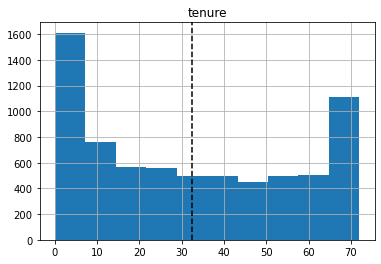

In [10]:
telcochurn.hist(column='tenure')
plt.axvline(telcochurn["tenure"].mean(),color="k",
            linestyle="dashed")

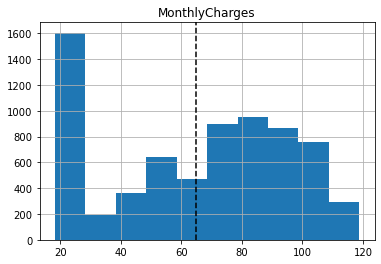

In [11]:
telcochurn.hist(column='MonthlyCharges')
plt.axvline(telcochurn["MonthlyCharges"].mean(),color="k",
            linestyle="dashed")

<AxesSubplot:xlabel='Partner', ylabel='Count'>

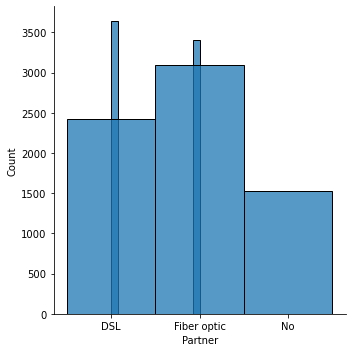

In [12]:
sns.displot(telcochurn["Partner"])
sns.histplot(telcochurn["InternetService"])

C:\Users\henry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

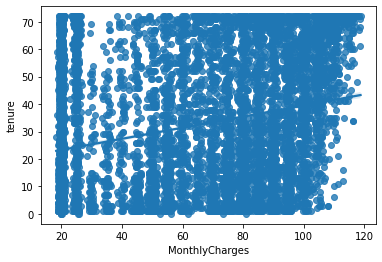

In [13]:
sns.regplot(telcochurn['MonthlyCharges'], telcochurn['tenure'])